In [34]:
import os
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

work_dir = os.path.expanduser('~/development/python/a_python_guide_to_geophysics/FernandinaSenDT128')
os.chdir(work_dir)
print('Go to directory:', work_dir)

Go to directory: /Users/yunjunz/development/python/a_python_guide_to_geophysics/FernandinaSenDT128


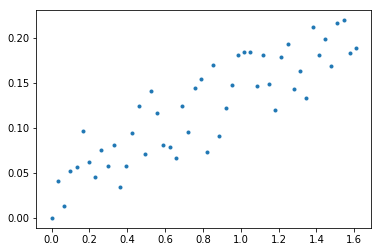

In [56]:
## simulation
vel_sim = 0.1 #m/year
num_date = 50
t = np.arange(num_date) * 12 / 365.25 + 2014.5
t -= t[0]
dis_sim = t * vel_sim + np.random.rand(num_date) * 0.1
dis_sim -= dis_sim[0]
plt.figure()
plt.plot(t, dis_sim, '.')
plt.show()

In [62]:
## solution 0 : di = ti * v + c [right]
A0 = np.ones((num_date, 2), dtype=np.float64)
A0[:, 0] = t + 2014.05
vel_est0, c0 = np.dot(np.linalg.pinv(A0), dis_sim)
#vel_est0, c0 = linalg.lstsq(A0, dis_sim, cond=1e-15)[0]
dis_est0 = (t + 2014.05) * vel_est0 + c0
print('solution 0 with velocity: {} m/year'.format(vel_est0))

solution 0 with velocity: 0.10664295635538748 m/year


In [63]:
## solution 1 : di = ti * v + c [right]
A1 = np.ones((num_date, 2), dtype=np.float32)
A1[:, 0] = t
vel_est1, c = np.dot(np.linalg.pinv(A1), dis_sim)
#vel_est1, c = linalg.lstsq(A1, dis_sim, cond=1e-15)[0]
dis_est1 = t * vel_est1 + c
print('solution 1 with velocity: {} m/year'.format(vel_est1))

solution 1 with velocity: 0.10664295846696922 m/year


In [59]:
## solution 2 : di - d1 = (ti - t1) * v [wrong]
A2 = np.array(t, dtype=np.float32).reshape(-1, 1)
vel_est2 = np.dot(np.linalg.pinv(A2), dis_sim)
#vel_est2 = linalg.lstsq(A2, dis_sim, cond=1e-15)[0]
dis_est2 = t* vel_est2
print('solution 2 with velocity: {} m/year'.format(vel_est2))

solution 2 with velocity: [0.14007259] m/year


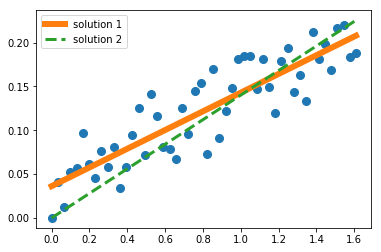

In [60]:
plt.figure()
plt.plot(t, dis_sim, '.', ms=16)
plt.plot(t, dis_est1, '-',  lw=6, label='solution 1')
plt.plot(t, dis_est2, '--', lw=3, label='solution 2')
plt.legend()
plt.show()

In [47]:
t + 2014.05

array([2014.05      , 2014.08285421, 2014.11570842, 2014.14856263,
       2014.18141684, 2014.21427105, 2014.24712526, 2014.27997947,
       2014.31283368, 2014.34568789, 2014.37854209, 2014.4113963 ,
       2014.44425051, 2014.47710472, 2014.50995893, 2014.54281314,
       2014.57566735, 2014.60852156, 2014.64137577, 2014.67422998,
       2014.70708419, 2014.7399384 , 2014.77279261, 2014.80564682,
       2014.83850103, 2014.87135524, 2014.90420945, 2014.93706366,
       2014.96991786, 2015.00277207, 2015.03562628, 2015.06848049,
       2015.1013347 , 2015.13418891, 2015.16704312, 2015.19989733,
       2015.23275154, 2015.26560575, 2015.29845996, 2015.33131417,
       2015.36416838, 2015.39702259, 2015.4298768 , 2015.46273101,
       2015.49558522, 2015.52843943, 2015.56129363, 2015.59414784,
       2015.62700205, 2015.65985626, 2015.69271047, 2015.72556468,
       2015.75841889, 2015.7912731 , 2015.82412731, 2015.85698152,
       2015.88983573, 2015.92268994, 2015.95554415, 2015.98839

In [67]:
from datetime import datetime as dt
date_list = ['20141215', '20150101']
dates = [dt.strptime(i, '%Y%m%d') for i in date_list]

In [69]:
date_list2 = [dt.strftime(i, '%Y%m%d') for i in dates]

In [70]:
date_list2

['20141215', '20150101']